In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#200 generations ; 4 array or matrix ; alpha 2000 or 7000 ; m 0.001 or 0.01 ; s 0.001 or 0.01
# J 1000; point_mutation; all defaults otherwise
# ecological strength 1
# Testing array VS non array
arr_pw = pd.read_csv("../../array_noarray/array_pw/SIMOUT.txt", sep="\t", header=0)
#matrix_mutualism_pw = pd.read_csv("../../matrix_mutualism/SIMOUT.txt", sep="\t", header=0)
matrix_pw = pd.read_csv("../../matrix_assessment/SIMOUT.txt", sep="\t", header=0)
noarr_pw = pd.read_csv("../../array_noarray/noarray_pw/SIMOUT.txt", sep="\t", header=0)

print(arr_pw.shape)
print(matrix_pw.columns[24])
print(arr_pw.columns[21])


(160, 81)
S
S


In [6]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
ttvals_pw, ttres_pw = stats.ttest_ind(arr_pw.iloc[:, 21:], matrix_pw.iloc[:, 24:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')


ttvals_pw2, ttres_pw2 = stats.ttest_ind(noarr_pw.iloc[:, 21:], matrix_pw.iloc[:, 24:])
print(ttres_pw2[ttres_pw2<0.05])
ttres_pw2 = multitest.multipletests(ttres_pw2,method='bonferroni')
print(ttres_pw)

[0.03405233 0.01640514 0.01124676 0.03861028 0.02088206 0.01570524
 0.00422992]
[0.04934765 0.04326865]
(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]), array([1.        , 1.        , 1.        , 0.98430837, 0.67480555,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       0.94231422, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1. 

<ipython-input-6-fa49a8fa092e>:4: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])
<ipython-input-6-fa49a8fa092e>:9: RuntimeWarning: invalid value encountered in less
  print(ttres_pw2[ttres_pw2<0.05])


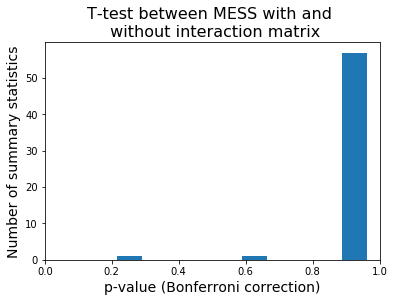

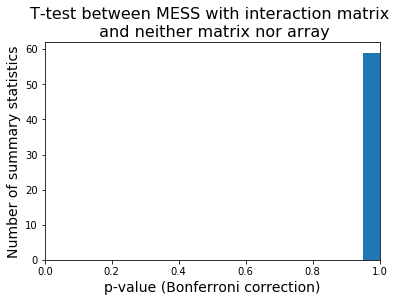

In [9]:
plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS with and \n without interaction matrix",size=16)
plt.show()
plt.close()


plt.hist(ttres_pw2[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS with interaction matrix \n and neither matrix nor array",size=16)
plt.show()
plt.close()

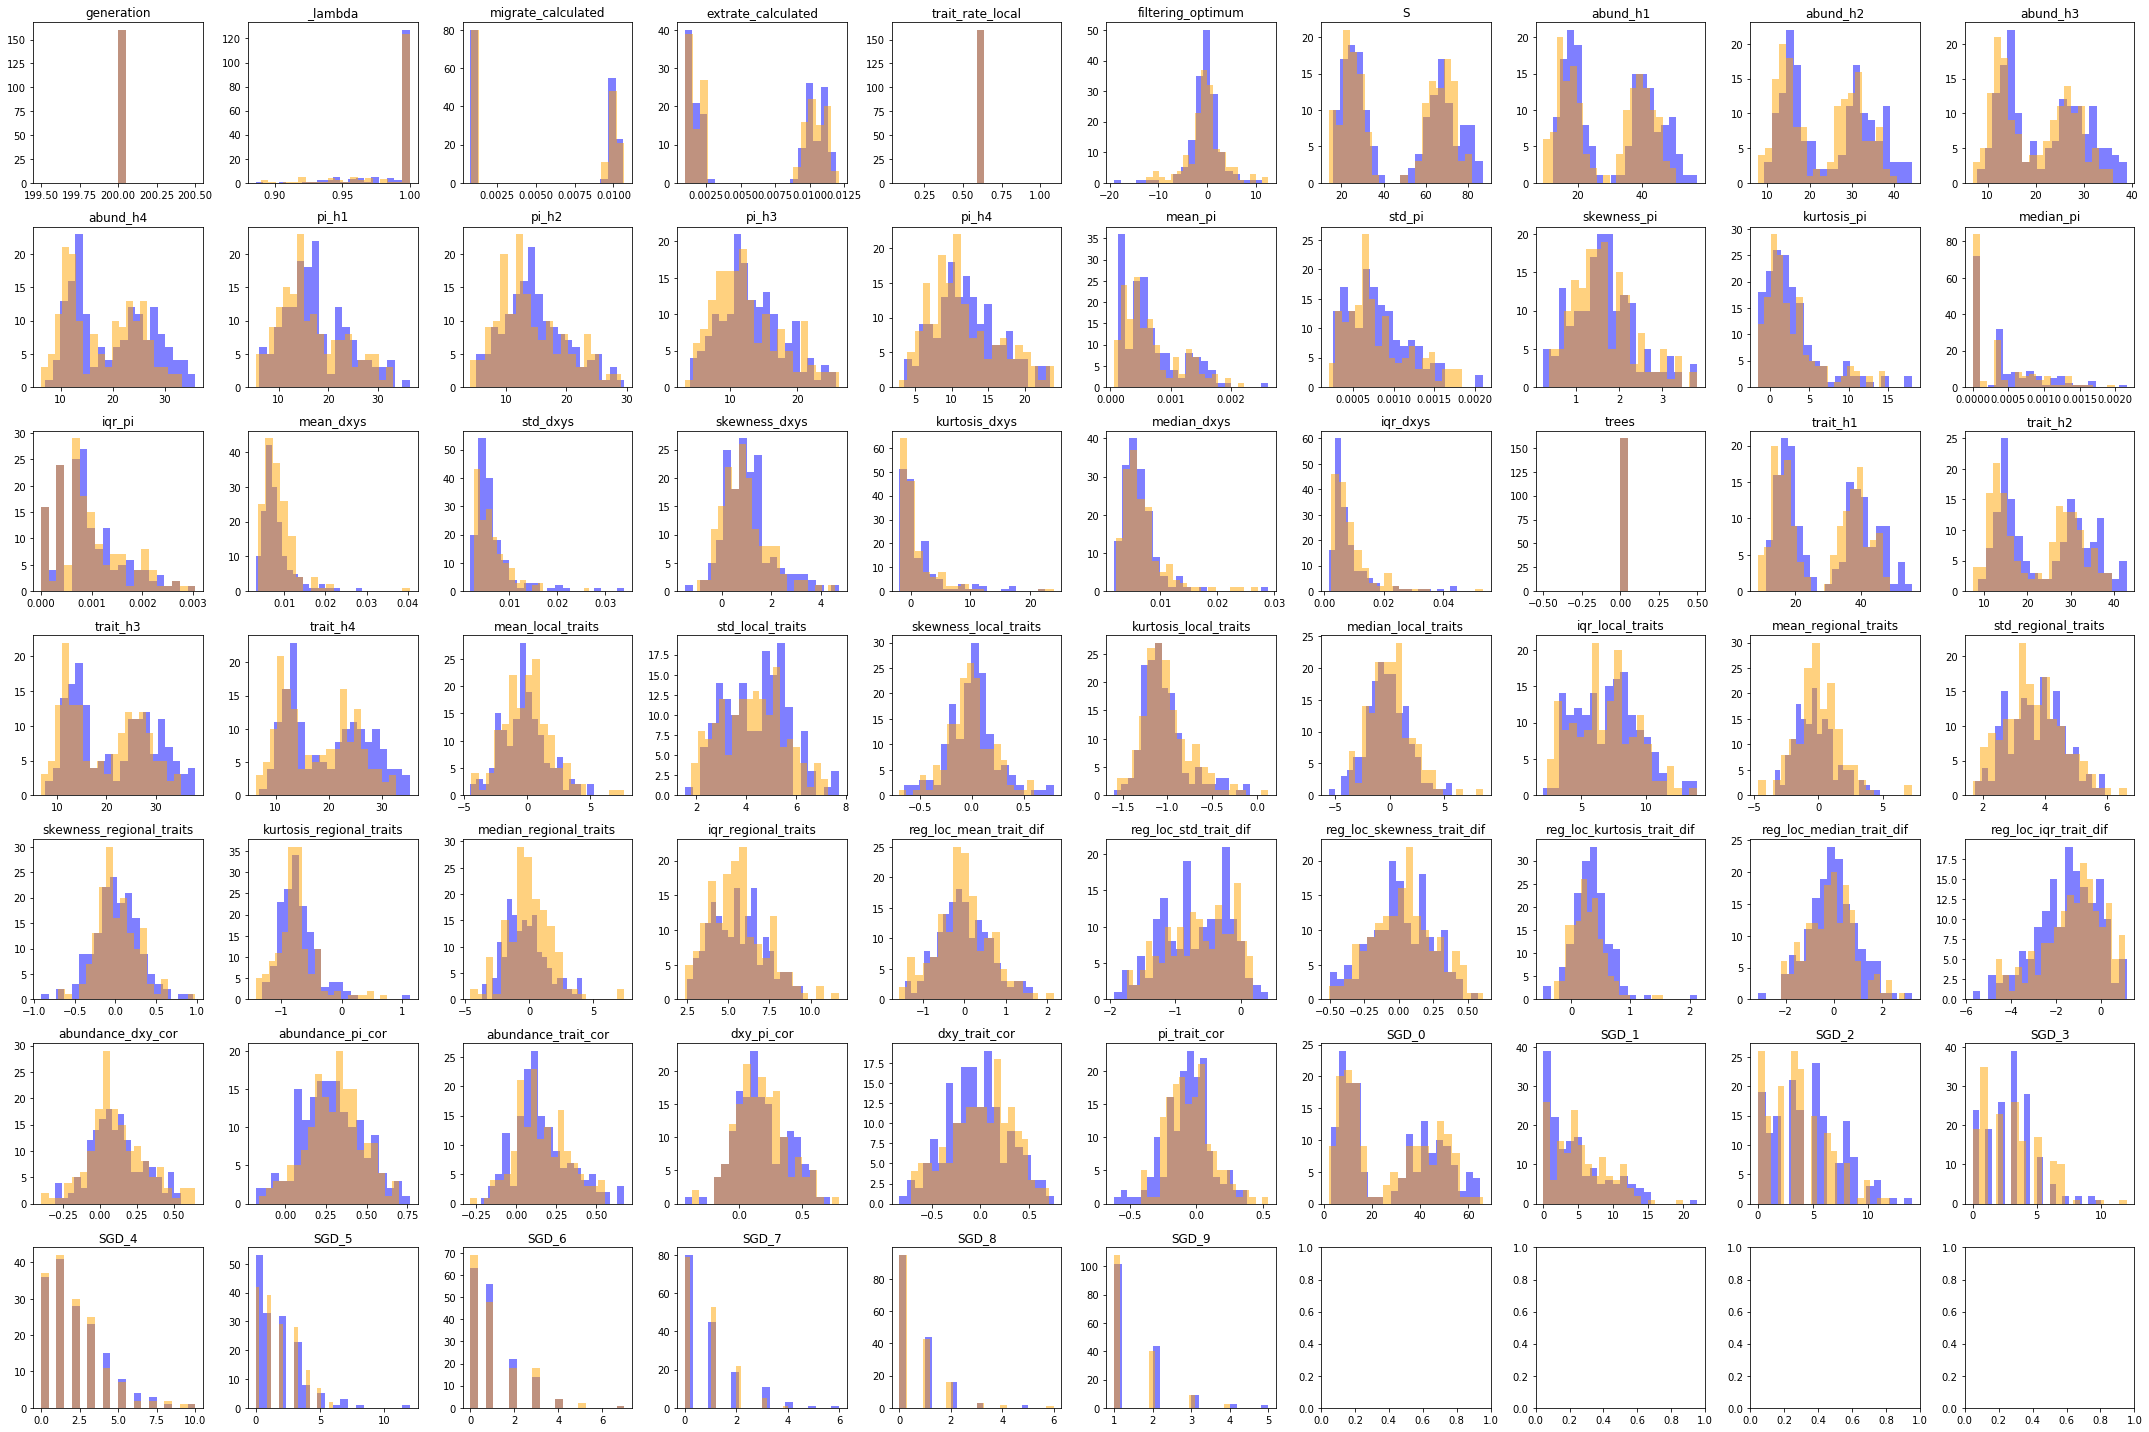

In [16]:
# Pairwise
# Array is blue
# No array is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_pw.columns)[15:], axs):
    ax.hist(arr_pw[p], color='blue', bins=20, alpha=0.5)
    ax.hist(matrix_pw[p], color='orange', bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()